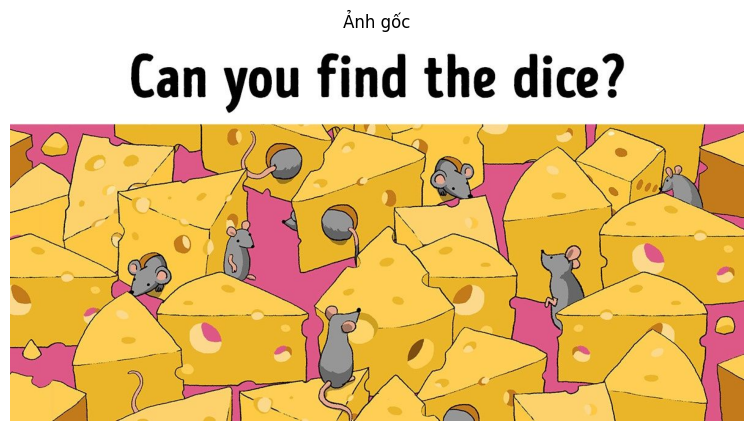

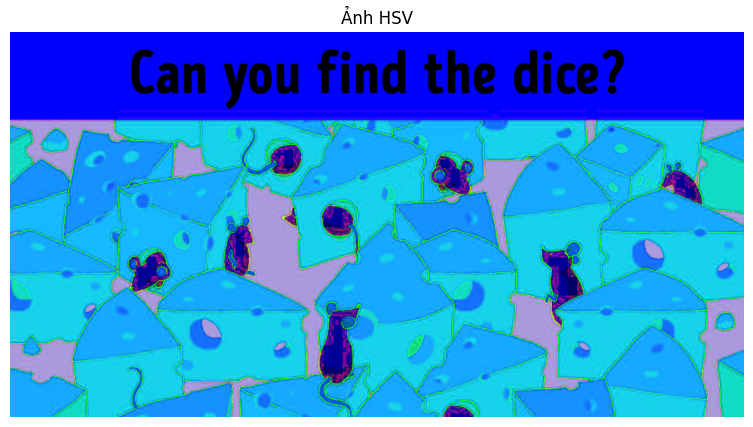

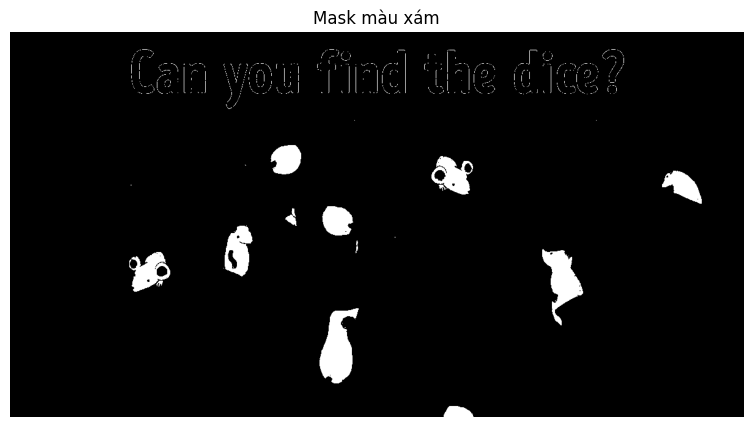

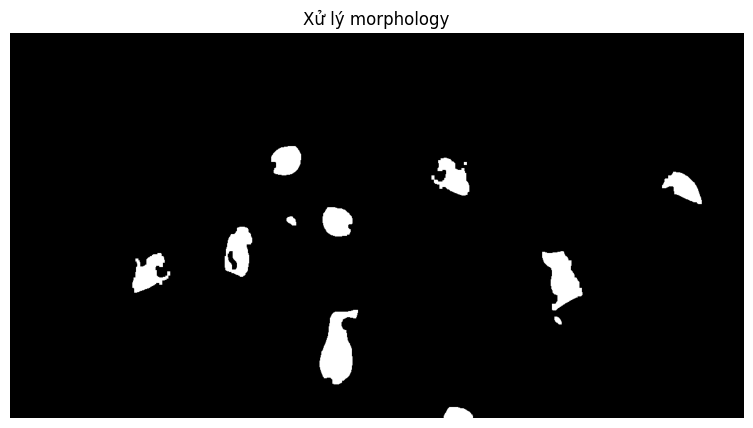

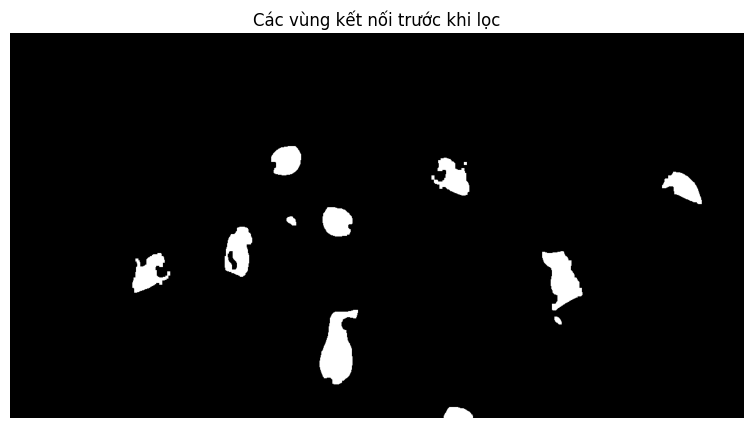

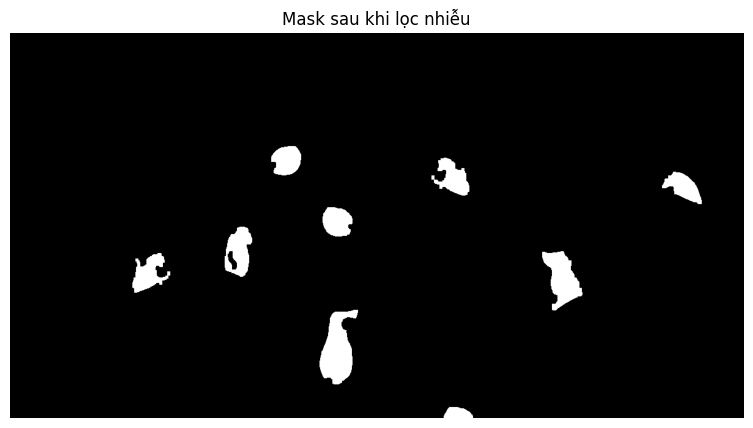

Số lượng chuột đếm được: 9


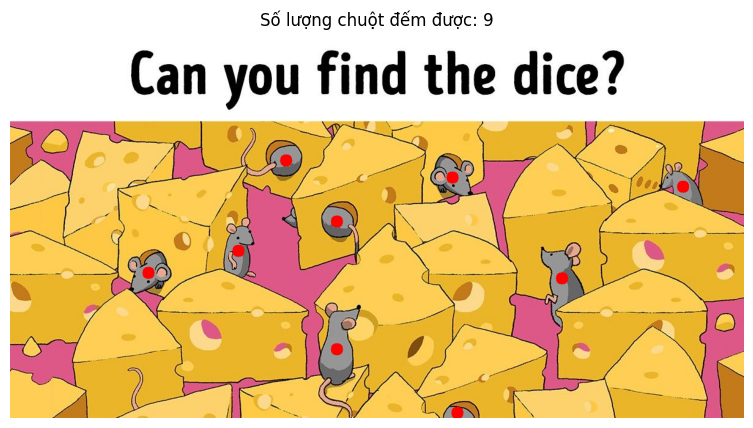

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_image(title, img):
    plt.figure(figsize=(10, 5))
    plt.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
    plt.axis("off")
    plt.title(title)
    plt.show()

image_path = "/content/mouse.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
show_image("Ảnh gốc", image_rgb)

# Cvt HSV
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
show_image("Ảnh HSV", image_hsv)

# Định nghĩa ngưỡng màu để tách chuột (màu xám)
lower_gray = np.array([0, 0, 50])
upper_gray = np.array([180, 50, 200])

# Mask vùng màu xám (chuột)
mask = cv2.inRange(image_hsv, lower_gray, upper_gray)
show_image("Mask màu xám", mask)

# Xử lý morphology
kernel = np.ones((5,5), np.uint8)
mask_cleaned = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask_cleaned = cv2.morphologyEx(mask_cleaned, cv2.MORPH_CLOSE, kernel)
show_image("Xử lý morphology", mask_cleaned)

# Tìm các vùng trong mask
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(mask_cleaned, connectivity=8)

label_viz = np.zeros_like(mask_cleaned, dtype=np.uint8)
for i in range(1, num_labels):
    if stats[i, cv2.CC_STAT_AREA] > 0:
        label_viz[labels == i] = 255
show_image("Các vùng kết nối trước khi lọc", label_viz)

# Lọc bỏ các vùng quá nhỏ (nhiễu)
min_size = 500
filtered_centroids = [centroids[i] for i in range(1, num_labels) if stats[i, cv2.CC_STAT_AREA] > min_size]

filtered_mask = np.zeros_like(mask_cleaned, dtype=np.uint8)
for i in range(1, num_labels):
    if stats[i, cv2.CC_STAT_AREA] > min_size:
        filtered_mask[labels == i] = 255
show_image("Mask sau khi lọc nhiễu", filtered_mask)

num_mice = len(filtered_centroids)
print(f"Số lượng chuột đếm được: {num_mice}")

# Đánh dấu
detected_image = image_rgb.copy()
for c in filtered_centroids:
    cv2.circle(detected_image, (int(c[0]), int(c[1])), 10, (255, 0, 0), -1)

show_image(f"Số lượng chuột đếm được: {num_mice}", detected_image)